In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Read Excel file
df = pd.read_excel('/content/ecommerce retail.xlsx')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
#Checking null values
null_values_per_column = df.isnull().sum()
print(null_values_per_column)

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [ ]:
# Drop null values
df = df.dropna(subset=['CustomerID'])
df['CustomerID'] = df['CustomerID'].astype(int)

df.count()

/tmp/ipython-input-9-1504548097.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CustomerID'] = df['CustomerID'].astype(int)


,0
InvoiceNo,406829
StockCode,406829
Description,406829
Quantity,406829
InvoiceDate,406829
UnitPrice,406829
CustomerID,406829
Country,406829


In [ ]:
# Standardize date format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
current_date = pd.to_datetime('31/12/2011', format='%d/%m/%Y')

/tmp/ipython-input-10-262708834.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [ ]:
# Drop duplicate rows
df = df.drop_duplicates(subset=['InvoiceNo', 'StockCode', 'InvoiceDate', 'CustomerID', 'Quantity'])

# Sum duplicated InvoiceID but different quantity
df = df.groupby(['InvoiceNo', 'StockCode', 'InvoiceDate', 'CustomerID'], as_index=False).agg({
    'Quantity': 'sum',
    'Description': 'first',
    'UnitPrice': 'first',
    'Country': 'first'
})

df = df[['InvoiceNo', 'StockCode', 'Description', 'Quantity','InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']]

In [ ]:
# Generate TotalPrice & IsCancelled
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df['IsCancelled'] = df['InvoiceNo'].astype(str).str.startswith('C')

In [ ]:
# Check if UnitPrice <0
df[df['UnitPrice']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,IsCancelled


In [ ]:
# Check if IsCancelled = False & Quantity <= 0
df[(df['IsCancelled'] == False) & (df['Quantity'] <= 0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,IsCancelled


In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,IsCancelled
0,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom,25.50,False
1,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom,15.30,False
2,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,False
3,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,False
4,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,False


In [ ]:
# Group by CustomerID to calculate R,F,M
new_df = df.groupby('CustomerID').agg(
    Recency=('InvoiceDate', lambda x: (current_date - x[~df.loc[x.index, 'IsCancelled']].max()).days),
    Frequency=('InvoiceNo', lambda x: x[~x.astype(str).str.startswith('C')].nunique()),
    Monetary=('TotalPrice', 'sum')
).reset_index()

In [ ]:
new_df[new_df['Monetary']==0]

,CustomerID,Recency,Frequency,Monetary
0,12346,346.0,1,0.0
692,13256,35.0,1,0.0
1059,13762,239.0,1,0.0
3245,16742,67.0,1,0.0
4358,18268,155.0,1,0.0


In [ ]:
# Exclude null values
new_df = new_df.dropna()

In [ ]:
new_df.drop(new_df[new_df['Monetary'] == 0].index, inplace=True)

In [ ]:
new_df.head()

,CustomerID,Recency,Frequency,Monetary
1,12347,23.0,7,4310.00
2,12348,96.0,4,1859.64
3,12349,39.0,1,1757.55
4,12350,331.0,1,334.40
5,12352,57.0,8,1265.36


In [ ]:
new_df['R_score'] = pd.qcut(new_df['Recency'].rank(method='first', ascending=False), 5, labels=[1, 2, 3, 4, 5])
new_df['F_score'] = pd.qcut(new_df['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])
new_df['M_score'] = pd.qcut(new_df['Monetary'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])
new_df['RFM_score'] = new_df['R_score'].astype(str) + new_df['F_score'].astype(str) + new_df['M_score'].astype(str)

In [ ]:
def assign_segment(rfm_score):
    if rfm_score in ['555', '554', '544', '545', '454', '455', '445']:
        return 'Champions'
    elif rfm_score in ['543', '444', '435', '355', '354', '345', '344', '335']:
        return 'Loyal'
    elif rfm_score in ['553','551','552','541','542','533','532','531','452','451','442','441','431','453','433','432','423','353','352','351','342','341','333','323']:
        return 'Potential Loyalist'
    elif rfm_score in ['512','511','422','421','412','411','311']:
        return 'New Customers'
    elif rfm_score in ['525','524','523','522','521','515','514','513','425','424','413','414','415','315','314','313']:
        return 'Promising'
    elif rfm_score in ['535','534','443','434','343','334','325','324']:
        return 'Need Attention'
    elif rfm_score in ['331','321','312','221','213','231','241','251']:
        return 'About To Sleep'
    elif rfm_score in ['255','254','245','244','253','252','243','242','235','234','225','224','153','152','145','143','142','135','134','133','125','124']:
        return 'At Risk'
    elif rfm_score in ['155','154','144','214','215','115','114','113']:
        return 'Cannot Lose Them'
    elif rfm_score in ['332','322','233','232','223','222','132','123','122','212','211']:
        return 'Hibernating customers'
    elif rfm_score in ['111','112','121','131','141','151']:
        return 'Lost customers'
    else:
        return 'Others'

new_df['Segment'] = new_df['RFM_score'].apply(assign_segment)

In [ ]:
new_df.head()

,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_score,Segment
1,12347,23.0,7,4310.00,5,5,5,555,Champions
2,12348,96.0,4,1859.64,2,4,4,244,At Risk
3,12349,39.0,1,1757.55,4,1,4,414,Promising
4,12350,331.0,1,334.40,1,1,2,112,Lost customers
5,12352,57.0,8,1265.36,3,5,4,354,Loyal


In [ ]:
df_segment = new_df.groupby('Segment').agg(
    Total_Customers=('CustomerID', 'nunique'),
    Total_Recency=('Recency', 'sum'),
    Total_Orders=('Frequency', 'sum'),
    Total_Sales=('Monetary', 'sum'),
).reset_index()

df_segment

,Segment,Total_Customers,Total_Recency,Total_Orders,Total_Sales
0,About To Sleep,283,30345.0,368,74472.630
1,At Risk,418,68000.0,1571,666930.391
2,Cannot Lose Them,95,24423.0,223,129535.650
3,Champions,830,26326.0,10089,5404008.830
4,Hibernating customers,699,118932.0,1086,278374.331
5,Lost customers,487,143639.0,522,91752.530
6,Loyal,436,24800.0,2322,973570.870
7,Need Attention,276,14914.0,851,284735.281
8,New Customers,263,12727.0,282,56330.760
9,Potential Loyalist,415,19609.0,1041,218007.920


/tmp/ipython-input-43-3283781858.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=new_df, x='Segment', order=new_df['Segment'].value_counts().index, palette='viridis')


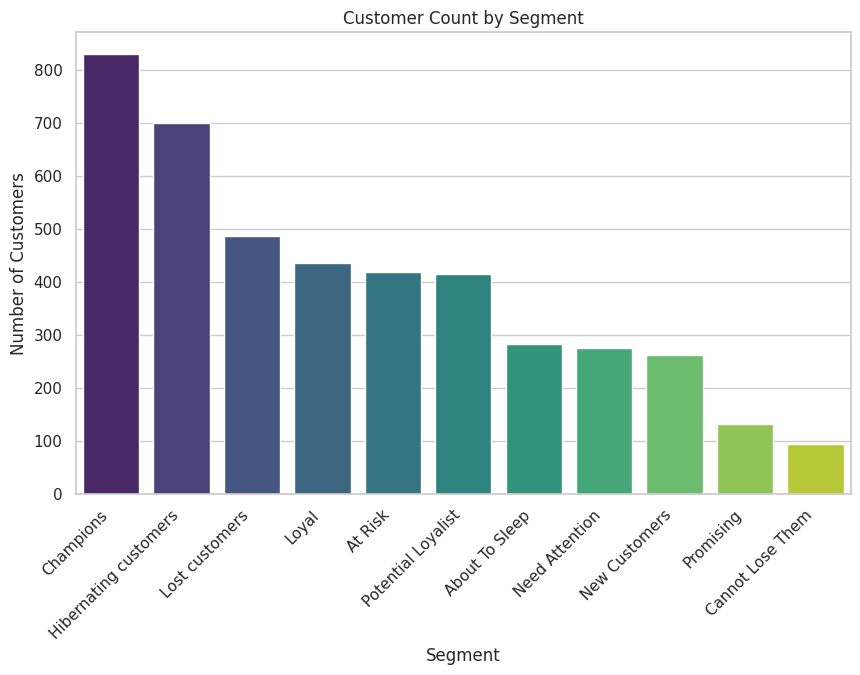

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=new_df, x='Segment', order=new_df['Segment'].value_counts().index, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Customer Count by Segment')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.show()

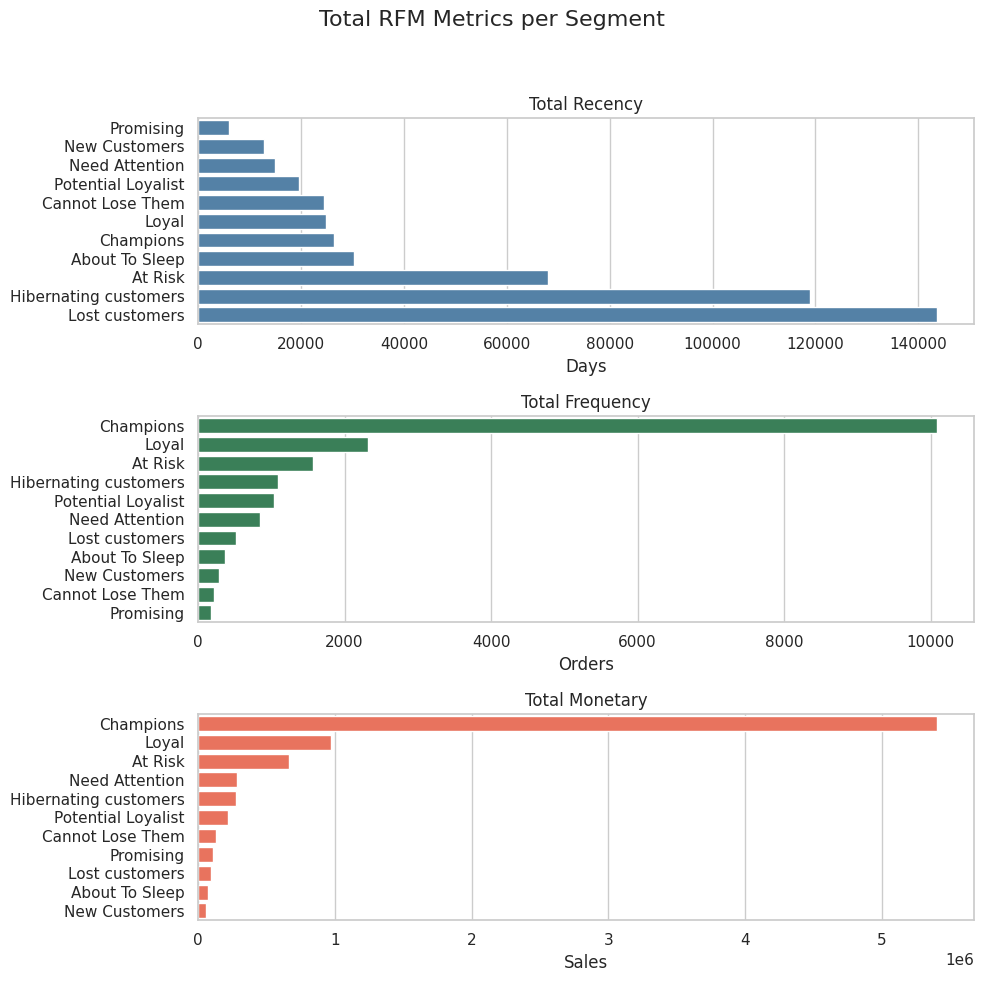

In [ ]:
sns.set(style='whitegrid')

fig, axs = plt.subplots(3, 1, figsize=(10, 10))
fig.suptitle('Total RFM Metrics per Segment', fontsize=16)

# Plot 1 - Total Recency
recency_sorted = df_segment.sort_values(by='Total_Recency', ascending=True)
sns.barplot(data=recency_sorted, y='Segment', x='Total_Recency', ax=axs[0], color='steelblue')
axs[0].set_title('Total Recency')
axs[0].set_xlabel('Days')
axs[0].set_ylabel('')

# Plot 2 - Total Frequency
frequency_sorted = df_segment.sort_values(by='Total_Orders', ascending=False)
sns.barplot(data=frequency_sorted, y='Segment', x='Total_Orders', ax=axs[1], color='seagreen')
axs[1].set_title('Total Frequency')
axs[1].set_xlabel('Orders')
axs[1].set_ylabel('')

# Plot 3 - Total Monetary
monetary_sorted = df_segment.sort_values(by='Total_Sales', ascending=False)
sns.barplot(data=monetary_sorted, y='Segment', x='Total_Sales', ax=axs[2], color='tomato')
axs[2].set_title('Total Monetary')
axs[2].set_xlabel('Sales')
axs[2].set_ylabel('')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

4 Groups:

The Elite Customers: Champions, Loyal

The Potential Stars: Promising, New Customers, Potential Loyalist, Need Attention

The Fading Ones: At Risk, About to Sleep, Hibernating

The Silent Crowd: Cannot Lose Them, Lost Customers

In [ ]:
def assign_group(segment):
    if segment in ['Champions', 'Loyal']:
        return 'The Elite Customers'
    elif segment in ['Promising', 'New Customers', 'Potential Loyalist', 'Need Attention']:
        return 'The Potential Stars'
    elif segment in ['At Risk', 'About To Sleep', 'Hibernating customers']:
        return 'The Fading Ones'
    elif segment in ['Cannot Lose Them', 'Lost customers']:
        return 'The Silent Crowd'
    else:
        return 'Others'

new_df['Group'] = new_df['Segment'].apply(assign_group)

In [ ]:
new_df
# new_df[new_df['CustomerID'] == 17315]

,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_score,Segment,Group
1,12347,23.0,7,4310.00,5,5,5,555,Champions,The Elite Customers
2,12348,96.0,4,1859.64,2,4,4,244,At Risk,The Fading Ones
3,12349,39.0,1,1757.55,4,1,4,414,Promising,The Potential Stars
4,12350,331.0,1,334.40,1,1,2,112,Lost customers,The Silent Crowd
5,12352,57.0,8,1265.36,3,5,4,354,Loyal,The Elite Customers
...,...,...,...,...,...,...,...,...,...,...
4367,18280,298.0,1,180.60,1,2,1,121,Lost customers,The Silent Crowd
4368,18281,201.0,1,80.82,1,2,1,121,Lost customers,The Silent Crowd
4369,18282,28.0,2,176.60,5,3,1,531,Potential Loyalist,The Potential Stars
4370,18283,24.0,16,2045.53,5,5,5,555,Champions,The Elite Customers


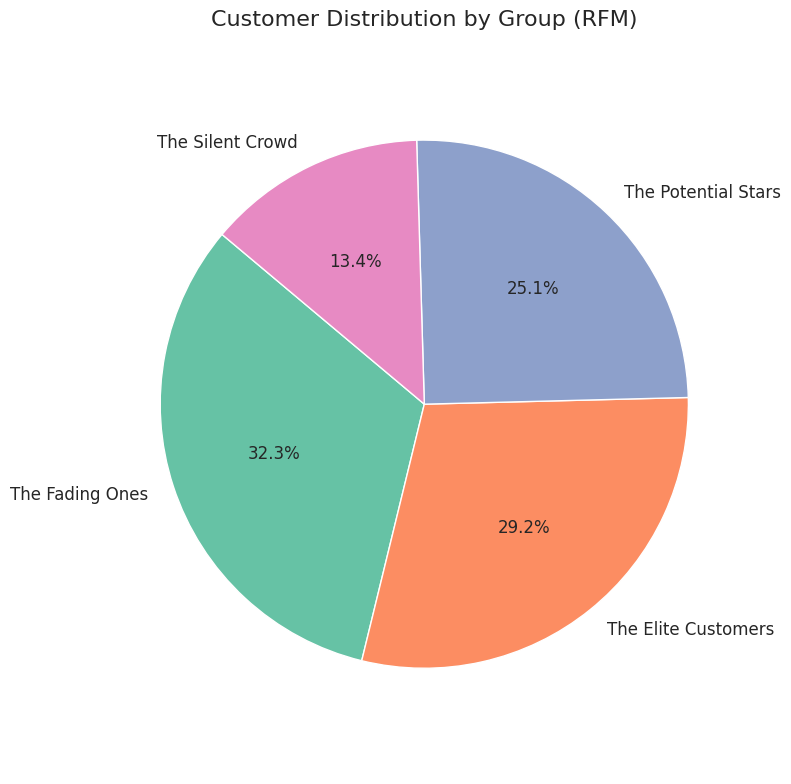

In [ ]:
# Đếm số lượng khách hàng theo Group
group_counts = new_df['Group'].value_counts()

# Apply Seaborn style
sns.set_style("whitegrid")

# Chọn bảng màu đẹp từ Seaborn (4 màu đầu tiên)
colors = sns.color_palette("Set2")[:4]

# Vẽ pie chart
plt.figure(figsize=(8, 8))
plt.pie(group_counts,
        labels=group_counts.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=colors,
        textprops={'fontsize': 12})

plt.title('Customer Distribution by Group (RFM)', fontsize=16)
plt.axis('equal')  # Vẽ hình tròn đều
plt.tight_layout()
plt.show()

In [ ]:
group_counts

,count
Group,
The Fading Ones,1400
The Elite Customers,1266
The Potential Stars,1086
The Silent Crowd,582


In [ ]:
# Filter valid orders: keep only non-cancelled invoices and relevant columns
df_valid = df[df['IsCancelled'] == False][['CustomerID', 'InvoiceDate', 'Country']]

# Merge to retain all columns from new_df and add InvoiceDate + Country
df_merged = new_df.merge(df_valid, on='CustomerID', how='left')

# Create Month column from InvoiceDate
df_merged['Month'] = df_merged['InvoiceDate'].dt.to_period('M').dt.to_timestamp()

# Remove duplicates: count each customer once per Group, Country, and Month
unique_monthly = df_merged.drop_duplicates(subset=['CustomerID', 'Group', 'Country', 'Month'])

# Group by Month and Group, count unique customers
group_month = unique_monthly.groupby(['Month', 'Group'])['CustomerID'].count().reset_index()

# Pivot to prepare for line chart: rows = Month, columns = Group
pivot_data = group_month.pivot(index='Month', columns='Group', values='CustomerID').fillna(0)

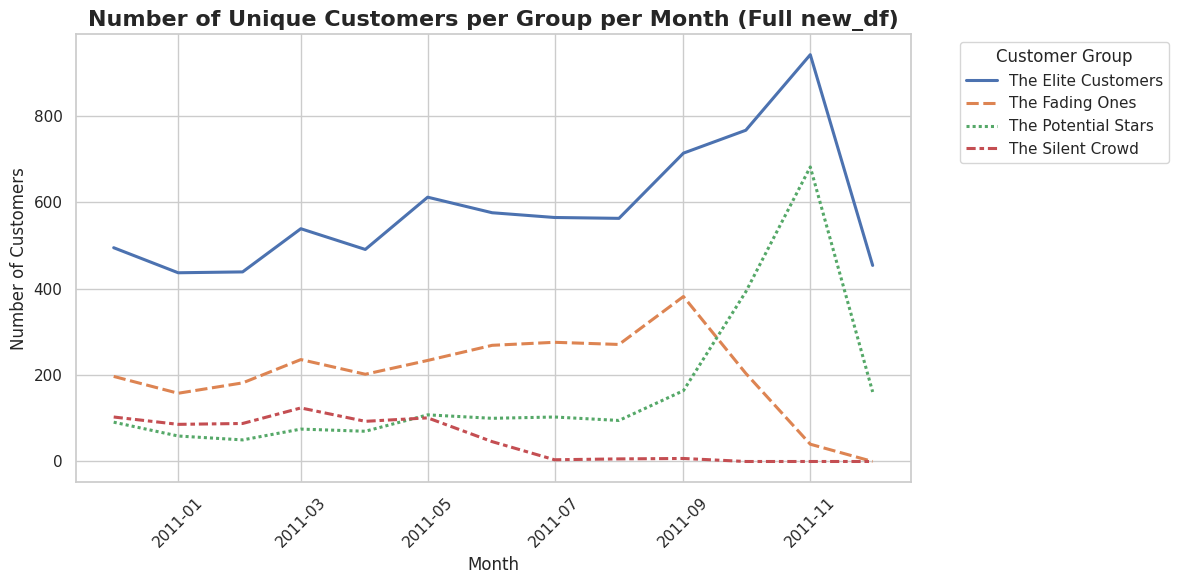

In [ ]:
# Plot
plt.figure(figsize=(12, 6))
sns.set(style='whitegrid')
sns.lineplot(data=pivot_data, linewidth=2.2)

plt.title('Number of Unique Customers per Group per Month (Full new_df)', fontsize=16, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Number of Customers')
plt.legend(title='Customer Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



/tmp/ipython-input-35-2721107332.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_monthly['R_score'] = unique_monthly['R_score'].astype(int)
/tmp/ipython-input-35-2721107332.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_monthly['F_score'] = unique_monthly['F_score'].astype(int)
/tmp/ipython-input-35-2721107332.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

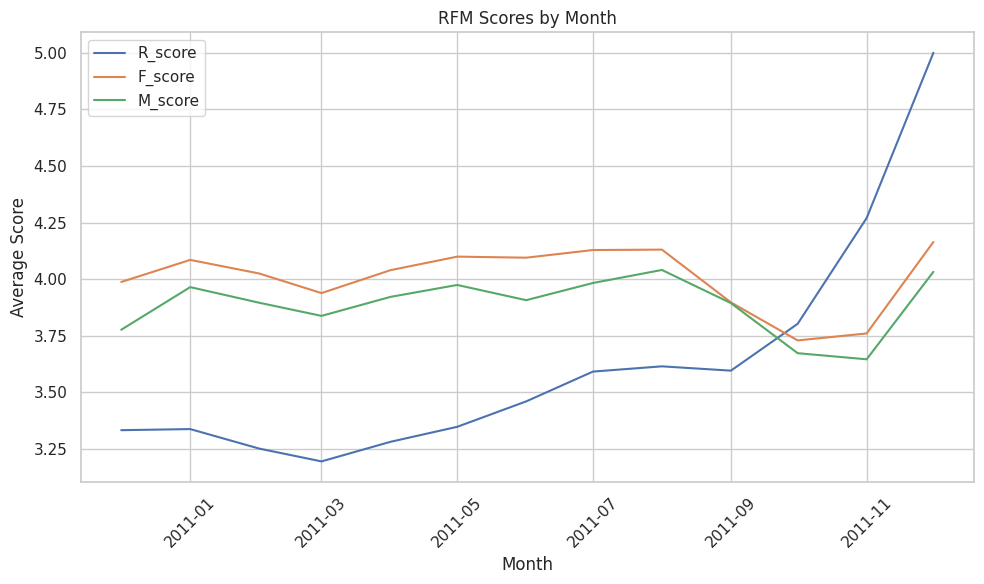

In [ ]:
# Make them int
unique_monthly['R_score'] = unique_monthly['R_score'].astype(int)
unique_monthly['F_score'] = unique_monthly['F_score'].astype(int)
unique_monthly['M_score'] = unique_monthly['M_score'].astype(int)

# Avg per month
avg_rfm_month = unique_monthly.groupby('Month')[['R_score', 'F_score', 'M_score']].mean().reset_index()

# Lineplot
plt.figure(figsize=(10,6))
sns.lineplot(data=avg_rfm_month, x='Month', y='R_score', label='R_score')
sns.lineplot(data=avg_rfm_month, x='Month', y='F_score', label='F_score')
sns.lineplot(data=avg_rfm_month, x='Month', y='M_score', label='M_score')
plt.title('RFM Scores by Month')
plt.xticks(rotation=45)
plt.ylabel('Average Score')
plt.tight_layout()
plt.legend()
plt.show()


In [ ]:
# Group by Country and Group, count unique customers
grouped = unique_monthly.groupby(['Country', 'Group'])['CustomerID'].nunique().reset_index()
grouped.rename(columns={'CustomerID': 'UniqueCustomers'}, inplace=True)

# Pivot: rows = Country, columns = Group, values = Unique Customers
pivot_df = grouped.pivot(index='Country', columns='Group', values='UniqueCustomers').fillna(0)

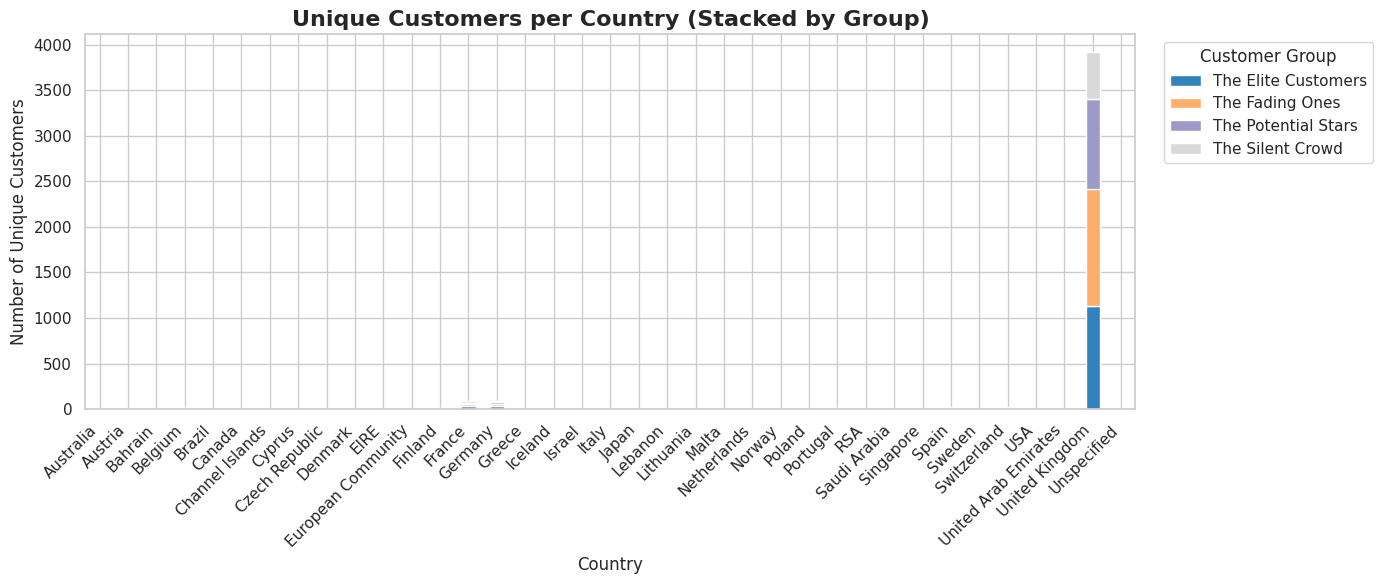

In [ ]:
# Plot stacked bar chart
pivot_df.plot(kind='bar', stacked=True, figsize=(14, 6), colormap='tab20c')

# Customize the plot
plt.title('Unique Customers per Country (Stacked by Group)', fontsize=16, fontweight='bold')
plt.xlabel('Country')
plt.ylabel('Number of Unique Customers')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Customer Group', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
# Remove United Kingdom from the dataset
grouped_no_uk = grouped[grouped['Country'] != 'United Kingdom']

# Pivot: rows = Country, columns = Group, values = Unique Customers
pivot_df_no_uk = grouped_no_uk.pivot(index='Country', columns='Group', values='UniqueCustomers').fillna(0)

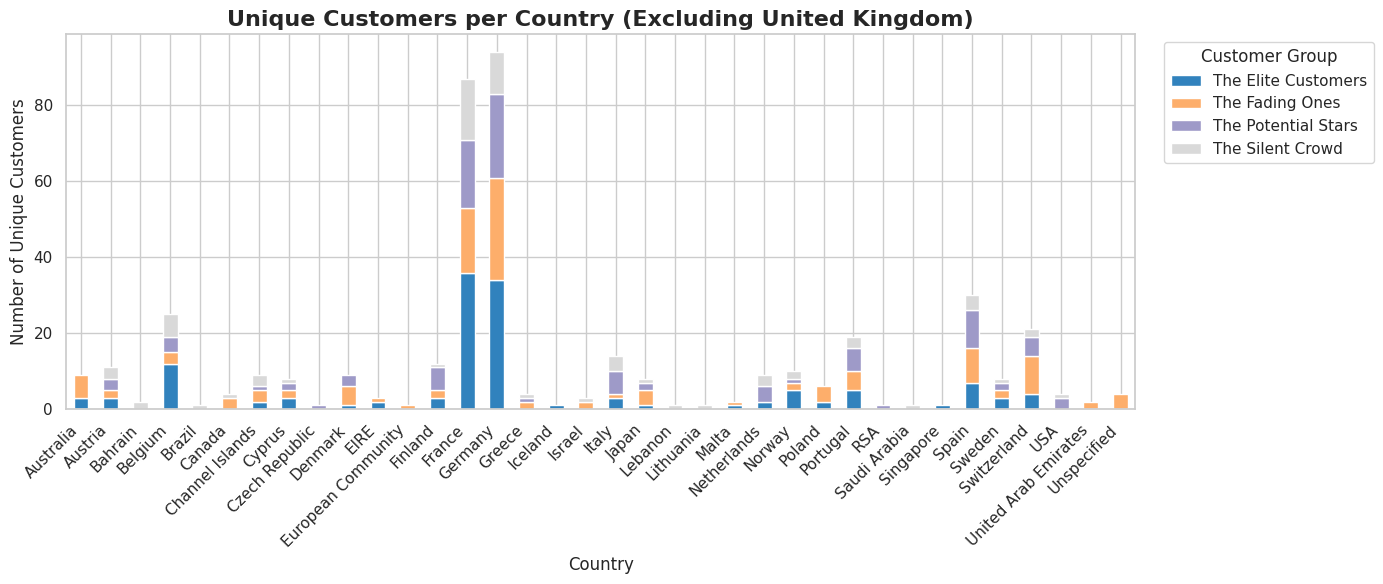

In [ ]:
# Plot stacked bar chart without United Kingdom
pivot_df_no_uk.plot(kind='bar', stacked=True, figsize=(14, 6), colormap='tab20c')

# Customize the plot
plt.title('Unique Customers per Country (Excluding United Kingdom)', fontsize=16, fontweight='bold')
plt.xlabel('Country')
plt.ylabel('Number of Unique Customers')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Customer Group', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()